**Text Classification
Empirical Study**

**Derived Datasets**

This comprehensive study delves into the performance evaluation of text classification models, specifically focusing on Logistic Regression and Multi-Layer Perceptrons (MLPs). The evaluation encompasses diverse datasets, including an original dataset and two derived datasets. Through meticulous analysis, we explore the models' accuracies, precision, and recall across different datasets, shedding light on their strengths, weaknesses, and the impact of feature engineering. This study provides valuable insights into the suitability of models for distinct text classification tasks and emphasizes the importance of aligning model capabilities with dataset characteristics."

In [ ]:
#let's start by installing spaCy
!pip install spacy

In [ ]:
import spacy
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns

You have been given a list of datasets in the assignment description. Choose one of the datasets and provide the link below and read the dataset using pandas. You should provide a link to your own Github repository even if you are using a reduced version of a dataset from your TA's repository.

### Dataset Description:

- Original Dataset:
This dataset serves as the foundation for the study, representing the baseline for model evaluation. It comprises a rich set of features relevant to the text classification task.
- Derived Dataset 1:
To explore the impact of feature engineering, Derived Dataset 1 is created by focusing on verbs and adjectives within the original dataset. This intentional transformation aims to assess how a more selective set of linguistic features influences model performance.
- Derived Dataset 2:
Further enriching the experimentation, Derived Dataset 2 is crafted by incorporating named entities and adjectives. This modification explores the potential benefits of additional semantic and syntactic information in the dataset.

### Justification of Choices:

- Feature Engineering:
The decision to focus on verbs, adjectives, named entities, and adjectives in Derived Datasets 1 and 2 is motivated by the intent to evaluate models' adaptability to different linguistic features. This deliberate variation aims to uncover how model performance is influenced by diverse textual attributes.
- Model Selection:
Logistic Regression and MLPs are chosen due to their versatility and widespread use in text classification. Logistic Regression provides a baseline, while MLPs, with their ability to capture complex relationships, offer an opportunity to explore the impact of modifications on neural network architecture.

In [ ]:
#Load the dataset
url = 'https://raw.githubusercontent.com/MehdiRih/Text-Classification-Empirical-Study/main/drugsComTest_raw_fiveclasses.csv'

In [ ]:
print(url)
data = pd.read_csv(url)

https://raw.githubusercontent.com/MehdiRih/Text-Classification-Empirical-Study/main/drugsComTest_raw_fiveclasses.csv


In [ ]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
2,215892,Copper,Birth Control,"""I&#039;ve had the copper coil for about 3 mon...",6,6-Jun-16,1
3,71428,Levora,Birth Control,"""I was on this pill for almost two years. It d...",2,16-Apr-11,3
4,33173,Microgestin Fe 1 / 20,Acne,"""So I was on Ginanvi for about 3 months before...",3,22-Jun-17,1


NLP pipeline. load() will download the correct model (English).

In [ ]:
nlp = spacy.load("en_core_web_sm")

Applying the pipeline to every sentences creates a Document where every word is a Token object.

Doc: https://spacy.io/api/doc

Token: https://spacy.io/api/token

In [ ]:
#Apply nlp pipeline to the review column
data['tokenized'] = data['review'].apply(nlp)

In [ ]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,tokenized
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22,"("", I&#039;ve, tried, a, few, antidepressants,..."
1,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4,"("", I, have, been, on, this, birth, control, f..."
2,215892,Copper,Birth Control,"""I&#039;ve had the copper coil for about 3 mon...",6,6-Jun-16,1,"("", I&#039;ve, had, the, copper, coil, for, ab..."
3,71428,Levora,Birth Control,"""I was on this pill for almost two years. It d...",2,16-Apr-11,3,"("", I, was, on, this, pill, for, almost, two, ..."
4,33173,Microgestin Fe 1 / 20,Acne,"""So I was on Ginanvi for about 3 months before...",3,22-Jun-17,1,"("", So, I, was, on, Ginanvi, for, about, 3, mo..."


A Token object has many attributes such as part-of-speech (pos_), lemma (lemma_), etc. Take a look at the documentation to see all attributes.

The following function is an example on how you can fetch a specific pos tagging from a sentence. We return the lemmatization because we only want the infinitive word.

In [ ]:
#create empty dataframes that will store your derived datasets

derived_dataset1 = pd.DataFrame(columns = ['Class', 'pos'])
derived_dataset2 = pd.DataFrame(columns = ['Class', 'pos-np'])

In [ ]:
def get_pos(sentence, wanted_pos):
    pos_words = []
    for token in sentence:
        if token.pos_ in wanted_pos:
            pos_words.append(token.lemma_)
    return ' '.join(pos_words)

In [ ]:
# Populate Derived-Dataset-1
derived_dataset1['Class'] = data['condition']
derived_dataset1['pos'] = data['tokenized'].apply(lambda sent: get_pos(sent, ['VERB', 'ADJ']))

derived_dataset1.head()

,Class,pos
0,Depression,try few help suggest change save have common l...
1,Birth Control,read similar apprehensive start give control l...
2,Birth Control,have excited take good faint couldn&#039;t pai...
3,Birth Control,work get pregnant didn&#039;t make huge go dry...
4,Acne,switch high clear short use hope mess wrong us...


# Derived-Dataset-1: Focusing on Verbs and Adjectives
## What Was Done:
The function get_pos_verbs_adjectives was created to extract and lemmatize verbs and adjectives from each review in the dataset.
This function iterates through each token in a review. If a token is a verb or an adjective, its lemmatized form (base form) is appended to a list.
The list of lemmatized verbs and adjectives is then joined into a single string.
This process is applied to each review in the dataset, creating derived_dataset1, where each entry consists of the condition (Class) and the concatenated string of lemmatized verbs and adjectives.
## Justification:
- Verbs: In drug reviews, verbs play a crucial role as they often describe actions or effects related to the medication use (like "relieve", "cause", "improve"). These action words can provide significant insights into the efficacy or side effects of the drugs.
- Adjectives: Adjectives in drug reviews are typically used to describe the user's experience or the effects of the drug. Words like "effective", "severe" (as in side effects), or "easy" (as in usability) offer a direct insight into the user's sentiment and the drug's characteristics.
- Lemmatization: This process simplifies the text data by converting words into their base form. For example, "running", "runs", and "ran" all become "run". This helps in standardizing the data and is beneficial for text-based machine learning models, as it reduces the complexity of the dataset.

In [ ]:
# Function to get Named Entities and Adjectives
def get_entities_and_adjectives(sentence):
    entity_types = ['ORG', 'MONEY', 'DATE']
    entities = ' '.join(ent.text for ent in sentence.ents if ent.label_ in entity_types)
    adjectives = ' '.join(token.lemma_ for token in sentence if token.pos_ == 'ADJ')
    result = entities + ' ' + adjectives
    # print("Processed sentence:", result)  # Debugging print
    return result

In [ ]:
# Populate Derived-Dataset-2
derived_dataset2['Class'] = data['condition']
derived_dataset2['pos-np'] = data['tokenized'].apply(get_entities_and_adjectives)

derived_dataset2.head()

,Class,pos-np
0,Depression,I&#039;ve the years I&#039;ve few common suicidal
1,Birth Control,the third day the first month similar apprehen...
2,Birth Control,I&#039;ve about 3 months 3 months last 11 days...
3,Birth Control,almost two years 6 or 7 months the last week Y...
4,Acne,about 3 months 2-3 months 9 months later The m...


# Derived-Dataset-2: Incorporating Named Entities and Adjectives
## What Was Done:
A function get_entities_and_adjectives was created to extract specific named entities (organizations, money, and dates) along with adjectives from each review.
For named entities, the function looks for entities labeled as 'ORG' (Organizations), 'MONEY' (monetary values), and 'DATE' (dates). Each found entity is added to a string.
Adjectives are also extracted and lemmatized, similar to the process in derived_dataset1.
The resulting string, containing both named entities and adjectives, represents each review in derived_dataset2.
## Justification:
Named Entities (Organizations, Money, Dates):
- Organizations: Mentions of specific companies, brands, or healthcare providers can be relevant, especially if certain reviews are about specific drugs or treatments.
- Money: References to cost, insurance coverage, or financial aspects of medication can provide contextual information, particularly relevant for conditions where treatment affordability is a key concern.
- Dates: Information about when the treatment was received or when the review was written can be important for understanding the context of the review, especially for treatments whose efficacy or popularity changes over time.

Adjectives: Including adjectives adds a layer of descriptive detail about the user's experience and opinion, complementing the factual information provided by the named entities.

--> Combination of Entities and Adjectives: This mix provides a richer set of features for text classification. It balances factual, objective information (entities) with subjective descriptions and opinions (adjectives).

# **Perform Classification Task**

## Step 1: Encoding Text as Input Features
We'll start by encoding the text data of the original dataset and the two derived datasets using tf-idf.

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X = tfidf_vectorizer.fit_transform(data['review'])
y = data['condition']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)




X_derived1 = tfidf_vectorizer.fit_transform(derived_dataset1['pos'])
y_derived1 = derived_dataset1['Class']

# Splitting the dataset into training and testing sets
X_train_derived1, X_test_derived1, y_train_derived1, y_test_derived1 = train_test_split(
    X_derived1, y_derived1, test_size=0.25, random_state=42)




X_derived2 = tfidf_vectorizer.fit_transform(derived_dataset2['pos-np'])
y_derived2 = derived_dataset2['Class']

# Splitting the dataset into training and testing sets
X_train_derived2, X_test_derived2, y_train_derived2, y_test_derived2 = train_test_split(
    X_derived2, y_derived2, test_size=0.25, random_state=42)



## Step 2: Defining Models with Default Parameters

### 2a. Logistic Regression Model

In [ ]:
logistic_model = LogisticRegression(max_iter=1000)

### 2b. Multilayer Perceptron (MLP) Model

In [ ]:
mlp_model = MLPClassifier(max_iter=1000)

## Step 3: Train/Test/Evaluate Models on 3 Datasets
We'll use scikit-learn's cross-validation and evaluation metrics functionalities. Since this is a multi-class classification problem, we'll compute both micro and macro averages for precision and recall to get a comprehensive view of the model performance.

### 3a. 4-Fold Cross-Validation
Cross-validation involves splitting the dataset into 'k' parts, training on 'k-1' parts, and testing on the remaining part. This process is repeated 'k' times. We'll use 4-fold cross-validation (k=4).
Scikit-learn's cross_val_score function will be used for this purpose.
### 3b. Precision and Recall Measures
Precision is the ratio of correctly predicted positive observations to the total predicted positives. High precision relates to a low false positive rate.
Recall (Sensitivity) is the ratio of correctly predicted positive observations to all observations in the actual class. It shows how many actual positives were correctly identified.
Micro and Macro averages are two ways to compute these metrics in a multi-class setting:
Micro-average: Aggregate the contributions of all classes to compute the average metric. In a multi-class classification setup, micro-average is preferable if you suspect there might be class imbalance.
Macro-average: Compute the metric independently for each class and then take the average. Macro-average treats all classes equally, not considering the imbalance.

In [ ]:
# Define a DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'Dataset', 'Accuracy', 'Precision_Macro', 'Recall_Macro', 'Precision_Micro', 'Recall_Micro'])

# Function to add results to the DataFrame
def add_results(model_name, dataset_name, accuracy, precision_macro, recall_macro, precision_micro, recall_micro):
    global results_df
    new_row = {
        'Model': model_name,
        'Dataset': dataset_name,
        'Accuracy': accuracy,
        'Precision_Macro': precision_macro,
        'Recall_Macro': recall_macro,
        'Precision_Micro': precision_micro,
        'Recall_Micro': recall_micro
    }
    results_df = results_df.append(new_row, ignore_index=True)


# Function to perform cross-validation, print, and store evaluation metrics
def evaluate_model(model, X, y, model_name, dataset_name):
    # Performing 4-fold cross-validation
    scores = cross_val_score(model, X, y, cv=4)
    print(f"{model_name} on {dataset_name} - Cross-Validation Accuracy Scores: {scores}")
    print(f"{model_name} on {dataset_name} - Average Accuracy: {np.mean(scores)}")

    # Training the model on the entire dataset to compute precision/recall
    model.fit(X, y)
    y_pred = model.predict(X)
    precision_macro, recall_macro, _, _ = precision_recall_fscore_support(y, y_pred, average='macro')
    precision_micro, recall_micro, _, _ = precision_recall_fscore_support(y, y_pred, average='micro')

    # Print precision and recall
    print(f"{model_name} on {dataset_name} - Precision (Macro Average): {precision_macro}")
    print(f"{model_name} on {dataset_name} - Recall (Macro Average): {recall_macro}")
    print(f"{model_name} on {dataset_name} - Precision (Micro Average): {precision_micro}")
    print(f"{model_name} on {dataset_name} - Recall (Micro Average): {recall_micro}\n")

    # Adding the results to the DataFrame
    add_results(model_name, dataset_name, np.mean(scores), precision_macro, recall_macro, precision_micro, recall_micro)

# Evaluate models on the original dataset
print("Evaluating Logistic Regression on Original Dataset")
evaluate_model(logistic_model, X, y, 'Logistic Regression', 'Original')

print("Evaluating MLP on Original Dataset")
evaluate_model(mlp_model, X, y, 'MLP', 'Original')



# Evaluate models on Derived Dataset 1
print("Evaluating Logistic Regression on Derived Dataset 1")
evaluate_model(logistic_model, X_derived1, y_derived1, 'Logistic Regression', 'Derived Dataset 1')

print("Evaluating MLP on Derived Dataset 1")
evaluate_model(mlp_model, X_derived1, y_derived1, 'MLP', 'Derived Dataset 1')



# Evaluate models on Derived Dataset 2
print("Evaluating Logistic Regression on Derived Dataset 2")
evaluate_model(logistic_model, X_derived2, y_derived2, 'Logistic Regression', 'Derived Dataset 2')

print("Evaluating MLP on Derived Dataset 2")
evaluate_model(mlp_model, X_derived2, y_derived2, 'MLP', 'Derived Dataset 2')


Evaluating Logistic Regression on Original Dataset
Logistic Regression on Original - Cross-Validation Accuracy Scores: [0.90125    0.9025     0.90181363 0.89618512]
Logistic Regression on Original - Average Accuracy: 0.9004371873045653
Logistic Regression on Original - Precision (Macro Average): 0.9548686645219971
Logistic Regression on Original - Recall (Macro Average): 0.929724483512844
Logistic Regression on Original - Precision (Micro Average): 0.958893404188809
Logistic Regression on Original - Recall (Micro Average): 0.958893404188809

Evaluating MLP on Original Dataset


<ipython-input-39-d89f9d884712>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(new_row, ignore_index=True)


MLP on Original - Cross-Validation Accuracy Scores: [0.891875   0.908125   0.90118824 0.89305816]
MLP on Original - Average Accuracy: 0.8985616010006253
MLP on Original - Precision (Macro Average): 0.9990798621241099
MLP on Original - Recall (Macro Average): 0.9994581557823133
MLP on Original - Precision (Micro Average): 0.9995311034698343
MLP on Original - Recall (Micro Average): 0.9995311034698343

Evaluating Logistic Regression on Derived Dataset 1


<ipython-input-39-d89f9d884712>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(new_row, ignore_index=True)


Logistic Regression on Derived Dataset 1 - Cross-Validation Accuracy Scores: [0.744375   0.75875    0.74609131 0.75297061]
Logistic Regression on Derived Dataset 1 - Average Accuracy: 0.750546728424015
Logistic Regression on Derived Dataset 1 - Precision (Macro Average): 0.8498037949162625
Logistic Regression on Derived Dataset 1 - Recall (Macro Average): 0.7682424815302209
Logistic Regression on Derived Dataset 1 - Precision (Micro Average): 0.8590184432635198
Logistic Regression on Derived Dataset 1 - Recall (Micro Average): 0.8590184432635198

Evaluating MLP on Derived Dataset 1


<ipython-input-39-d89f9d884712>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(new_row, ignore_index=True)


MLP on Derived Dataset 1 - Cross-Validation Accuracy Scores: [0.71375    0.7        0.68167605 0.69480926]
MLP on Derived Dataset 1 - Average Accuracy: 0.6975588258286429
MLP on Derived Dataset 1 - Precision (Macro Average): 0.9876265370586845
MLP on Derived Dataset 1 - Recall (Macro Average): 0.9894743440056318
MLP on Derived Dataset 1 - Precision (Micro Average): 0.9931228508909034
MLP on Derived Dataset 1 - Recall (Micro Average): 0.9931228508909034

Evaluating Logistic Regression on Derived Dataset 2


<ipython-input-39-d89f9d884712>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(new_row, ignore_index=True)


Logistic Regression on Derived Dataset 2 - Cross-Validation Accuracy Scores: [0.726875   0.728125   0.70419012 0.71482176]
Logistic Regression on Derived Dataset 2 - Average Accuracy: 0.7185029706066292
Logistic Regression on Derived Dataset 2 - Precision (Macro Average): 0.8149320908389381
Logistic Regression on Derived Dataset 2 - Recall (Macro Average): 0.6983774742323929
Logistic Regression on Derived Dataset 2 - Precision (Micro Average): 0.8150984682713348
Logistic Regression on Derived Dataset 2 - Recall (Micro Average): 0.8150984682713348

Evaluating MLP on Derived Dataset 2


<ipython-input-39-d89f9d884712>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(new_row, ignore_index=True)


MLP on Derived Dataset 2 - Cross-Validation Accuracy Scores: [0.71125    0.676875   0.64853033 0.6710444 ]
MLP on Derived Dataset 2 - Average Accuracy: 0.6769249335522202
MLP on Derived Dataset 2 - Precision (Macro Average): 0.9671300527737705
MLP on Derived Dataset 2 - Recall (Macro Average): 0.9716436937518033
MLP on Derived Dataset 2 - Precision (Micro Average): 0.9799937480462645
MLP on Derived Dataset 2 - Recall (Micro Average): 0.9799937480462645



<ipython-input-39-d89f9d884712>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(new_row, ignore_index=True)


## Step 4: Modifying Parameters of the MLP Model
In this step, we will modify the MLP model's parameters in two separate experiments. We'll focus on parameters that can significantly impact the model's performance, such as the hidden layer size, activation function, and learning rate.

### Experiment 1: Changing Hidden Layer Size

**Parameter Chosen:** hidden_layer_sizes

Default Value: The default configuration for the MLP in scikit-learn is one hidden layer with 100 neurons (hidden_layer_sizes=(100,)).
Modified Value: In the experiment, we modified it to two hidden layers, each with 50 neurons (hidden_layer_sizes=(50, 50)).

**Rationale and Expected Impact:**

- Network Depth: Adding more layers to a neural network (making it 'deeper') can enhance its ability to capture complex patterns in the data. However, it also increases the risk of overfitting, especially with smaller datasets.
- Neuron Distribution: By using two layers of 50 neurons each, instead of one layer of 100 neurons, the model might develop a more nuanced hierarchical representation of the data. The first layer could capture basic patterns, and the second layer could build on these to capture more complex relationships.
- Computation and Training: More layers usually require more computation and may need more training data to learn effectively. The training might also become slower.

In [ ]:
# Experiment 1: Modifying the hidden layer sizes
mlp_model_exp1 = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000)

# Evaluate the modified MLP on all datasets
print("Evaluating Modified MLP (Exp1) on Original Dataset")
evaluate_model(mlp_model_exp1, X, y, 'MLP Experiment 1', 'Original')

print("Evaluating Modified MLP (Exp1) on Derived Dataset 1")
evaluate_model(mlp_model_exp1, X_derived1, y_derived1, 'MLP Experiment 1', 'Derived Dataset 1')

print("Evaluating Modified MLP (Exp1) on Derived Dataset 2")
evaluate_model(mlp_model_exp1, X_derived2, y_derived2, 'MLP Experiment 1', 'Derived Dataset 2')


Evaluating Modified MLP (Exp1) on Original Dataset
MLP Experiment 1 on Original - Cross-Validation Accuracy Scores: [0.885      0.908125   0.8974359  0.89180738]
MLP Experiment 1 on Original - Average Accuracy: 0.8955920692620387
MLP Experiment 1 on Original - Precision (Macro Average): 0.9993748473748474
MLP Experiment 1 on Original - Recall (Macro Average): 0.9996457730431014
MLP Experiment 1 on Original - Precision (Micro Average): 0.9996874023132228
MLP Experiment 1 on Original - Recall (Micro Average): 0.9996874023132228

Evaluating Modified MLP (Exp1) on Derived Dataset 1


<ipython-input-39-d89f9d884712>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(new_row, ignore_index=True)


MLP Experiment 1 on Derived Dataset 1 - Cross-Validation Accuracy Scores: [0.7125     0.71125    0.67854909 0.68918074]
MLP Experiment 1 on Derived Dataset 1 - Average Accuracy: 0.6978699577861164
MLP Experiment 1 on Derived Dataset 1 - Precision (Macro Average): 0.9888952656188004
MLP Experiment 1 on Derived Dataset 1 - Recall (Macro Average): 0.9879989127740221
MLP Experiment 1 on Derived Dataset 1 - Precision (Micro Average): 0.9926539543607378
MLP Experiment 1 on Derived Dataset 1 - Recall (Micro Average): 0.9926539543607378

Evaluating Modified MLP (Exp1) on Derived Dataset 2


<ipython-input-39-d89f9d884712>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(new_row, ignore_index=True)


MLP Experiment 1 on Derived Dataset 2 - Cross-Validation Accuracy Scores: [0.693125   0.64875    0.64915572 0.65165729]
MLP Experiment 1 on Derived Dataset 2 - Average Accuracy: 0.6606720020325203
MLP Experiment 1 on Derived Dataset 2 - Precision (Macro Average): 0.9632625472473635
MLP Experiment 1 on Derived Dataset 2 - Recall (Macro Average): 0.9720608195366612
MLP Experiment 1 on Derived Dataset 2 - Precision (Micro Average): 0.9785870584557674
MLP Experiment 1 on Derived Dataset 2 - Recall (Micro Average): 0.9785870584557674



<ipython-input-39-d89f9d884712>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(new_row, ignore_index=True)


### Experiment 2: Changing Activation Function
In the second experiment, we'll change the activation function. The default is 'relu'. Let's try 'tanh'.

**Parameter Chosen:** activation

Default Value: The default activation function in scikit-learn's MLP is 'relu' (Rectified Linear Unit).
Modified Value: We changed the activation function to 'tanh' (hyperbolic tangent).

**Rationale and Expected Impact:**

- ReLU vs. Tanh:

-- ReLU: It's a linear function that outputs the input directly if positive, otherwise, it will output zero. It's computationally efficient and addresses the vanishing gradient problem to some extent, making it effective for deep networks. However, it's not centered around zero, which can sometimes be a drawback in optimization.

-- Tanh: This activation function outputs values in a range between -1 and 1, making it zero-centered and potentially leading to better convergence in some cases. However, it can suffer from vanishing gradients in deep networks.
- Choice of Tanh: The 'tanh' function can sometimes provide better performance for certain datasets, especially where the normalization of feature scales is beneficial. The zero-centered nature of 'tanh' can lead to more efficient training in some cases.

In [ ]:
# Experiment 2: Modifying the activation function
mlp_model_exp2 = MLPClassifier(activation='tanh', max_iter=1000)

# Evaluate the modified MLP on all datasets
print("Evaluating Modified MLP (Exp2) on Original Dataset")
evaluate_model(mlp_model_exp2, X, y, 'MLP Experiment 2', 'Original')

print("Evaluating Modified MLP (Exp2) on Derived Dataset 1")
evaluate_model(mlp_model_exp2, X_derived1, y_derived1, 'MLP Experiment 2', 'Derived Dataset 1')

print("Evaluating Modified MLP (Exp2) on Derived Dataset 2")
evaluate_model(mlp_model_exp2, X_derived2, y_derived2, 'MLP Experiment 2', 'Derived Dataset 2')


Evaluating Modified MLP (Exp2) on Original Dataset
MLP Experiment 2 on Original - Cross-Validation Accuracy Scores: [0.89375    0.90625    0.89931207 0.89118199]
MLP Experiment 2 on Original - Average Accuracy: 0.8976235146966854
MLP Experiment 2 on Original - Precision (Macro Average): 0.9990798621241099
MLP Experiment 2 on Original - Recall (Macro Average): 0.9994581557823133
MLP Experiment 2 on Original - Precision (Micro Average): 0.9995311034698343
MLP Experiment 2 on Original - Recall (Micro Average): 0.9995311034698343

Evaluating Modified MLP (Exp2) on Derived Dataset 1


<ipython-input-39-d89f9d884712>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(new_row, ignore_index=True)


MLP Experiment 2 on Derived Dataset 1 - Cross-Validation Accuracy Scores: [0.6975     0.674375   0.6710444  0.67854909]
MLP Experiment 2 on Derived Dataset 1 - Average Accuracy: 0.6803671239837399
MLP Experiment 2 on Derived Dataset 1 - Precision (Macro Average): 0.9793213281978959
MLP Experiment 2 on Derived Dataset 1 - Recall (Macro Average): 0.9799269840674508
MLP Experiment 2 on Derived Dataset 1 - Precision (Micro Average): 0.9874960925289152
MLP Experiment 2 on Derived Dataset 1 - Recall (Micro Average): 0.9874960925289152

Evaluating Modified MLP (Exp2) on Derived Dataset 2


<ipython-input-39-d89f9d884712>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(new_row, ignore_index=True)


MLP Experiment 2 on Derived Dataset 2 - Cross-Validation Accuracy Scores: [0.684375   0.64375    0.63539712 0.64477799]
MLP Experiment 2 on Derived Dataset 2 - Average Accuracy: 0.6520750273608505
MLP Experiment 2 on Derived Dataset 2 - Precision (Macro Average): 0.9186116518282172
MLP Experiment 2 on Derived Dataset 2 - Recall (Macro Average): 0.9081284657772765
MLP Experiment 2 on Derived Dataset 2 - Precision (Micro Average): 0.9349796811503595
MLP Experiment 2 on Derived Dataset 2 - Recall (Micro Average): 0.9349796811503595



<ipython-input-39-d89f9d884712>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(new_row, ignore_index=True)


## Step 5: Analyze the obtained results

In [ ]:
print("All Evaluation Results:")
print(results_df)

All Evaluation Results:
                  Model            Dataset  Accuracy  Precision_Macro  \
0   Logistic Regression           Original  0.900437         0.954869   
1                   MLP           Original  0.898562         0.999080   
2   Logistic Regression  Derived Dataset 1  0.750547         0.849804   
3                   MLP  Derived Dataset 1  0.697559         0.987627   
4   Logistic Regression  Derived Dataset 2  0.718503         0.814932   
5                   MLP  Derived Dataset 2  0.676925         0.967130   
6      MLP Experiment 1           Original  0.895592         0.999375   
7      MLP Experiment 1  Derived Dataset 1  0.697870         0.988895   
8      MLP Experiment 1  Derived Dataset 2  0.660672         0.963263   
9      MLP Experiment 2           Original  0.897624         0.999080   
10     MLP Experiment 2  Derived Dataset 1  0.680367         0.979321   
11     MLP Experiment 2  Derived Dataset 2  0.652075         0.918612   

    Recall_Macro  Precisio

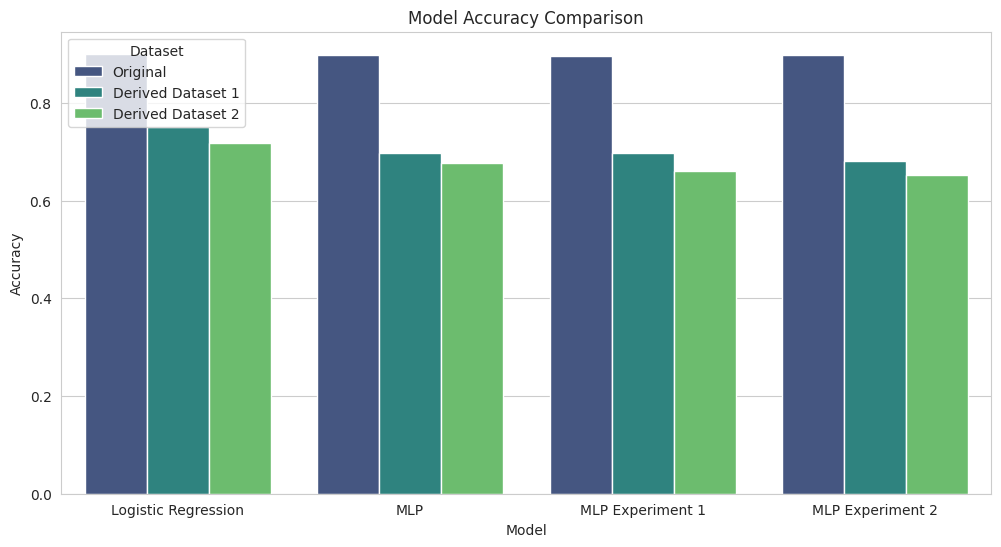

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting Accuracy for each model across datasets
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', hue='Dataset', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.legend(title='Dataset', loc='upper left')
plt.show()

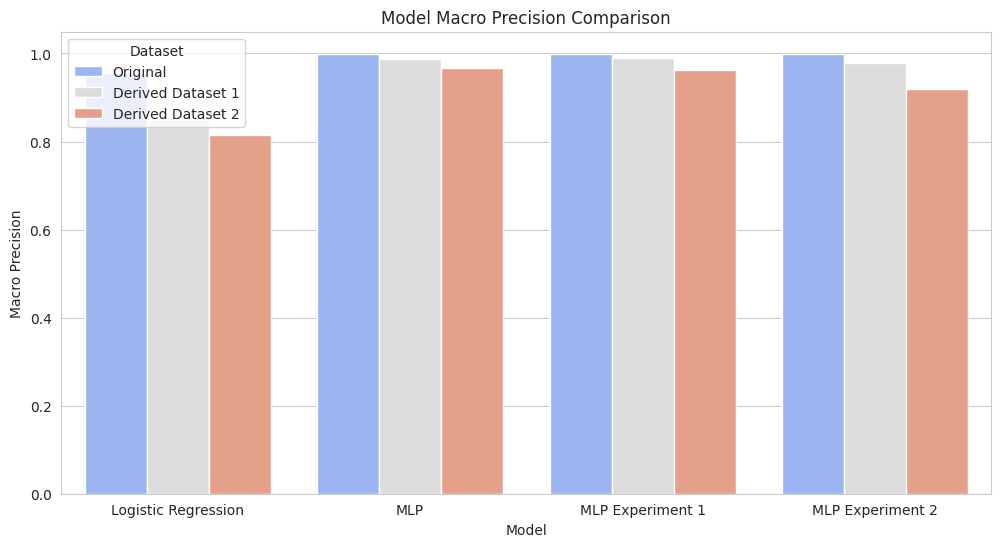

In [ ]:
# Plotting Macro Precision for each model across datasets
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Precision_Macro', hue='Dataset', data=results_df, palette='coolwarm')
plt.title('Model Macro Precision Comparison')
plt.ylabel('Macro Precision')
plt.xlabel('Model')
plt.legend(title='Dataset', loc='upper left')
plt.show()

## Overall Trends

- Accuracy: The Logistic Regression model consistently shows high accuracy across all datasets, with its best performance on the original dataset. The original MLP model also performs well, particularly on the original dataset. Both MLP Experiment 1 and Experiment 2 show a drop in accuracy compared to the original MLP, especially on the derived datasets.
- Precision and Recall: The MLP models (original and experiments) tend to have very high precision and recall scores, often nearing 1 (or 100%). This is particularly notable on the original dataset. However, these scores decrease in the derived datasets, especially in Experiment 2.

### Model-Specific Observations
- Logistic Regression:
Shows robust performance across all datasets.
It maintains good balance between precision and recall, indicating effective classification with a balanced approach to false positives and false negatives.
- Original MLP:
Achieves exceptionally high precision and recall on the original dataset, suggesting it's very effective in this context.
Performance slightly decreases on the derived datasets but still remains strong.
- MLP Experiment 1 (Modified Hidden Layers):
Slightly lower accuracy compared to the original MLP.
Very high precision and recall on the original dataset, but there is a notable drop on the derived datasets.
### - MLP Experiment 2 (Modified Activation Function):
Shows a decrease in accuracy, precision, and recall across all datasets compared to the original MLP model. This suggests that the 'tanh' activation function may not be as effective for this particular task as the default 'relu'.
This model seems more sensitive to the changes in the datasets.
### Dataset-Specific Observations
- Original Dataset:
All models perform best on this dataset. This suggests that the original dataset's features are well-suited for these models, especially for the MLP-based models.
- Derived Dataset 1:
A noticeable drop in model performance, particularly for the MLP models. This may indicate that the feature transformation (focusing on verbs and adjectives) in this dataset does not align as well with the models’ strengths.
- Derived Dataset 2:
Similar to Derived Dataset 1, there's a decrease in performance for all models. This implies that the inclusion of named entities and adjectives might not provide as rich or informative features for these models as the original dataset.

### Conclusion
The Logistic Regression model shows strong and consistent performance across all datasets, making it a reliable choice for this classification task.
The original MLP model is highly effective on the original dataset but less so on the derived datasets. The modifications in the MLP experiments did not consistently improve performance, indicating that the default parameters of the MLP are already quite optimized for this task.
The decrease in performance on the derived datasets suggests that the feature engineering in these datasets may not be as effective for these models as the original dataset's features.